## **Ridge Regression**

**Regularizationn**: \
It is the techinique using which we induce some added information in the machine learning model due to which the tendency to overfit decreases.

**Some regularization techniques are:**
* Ridge 
* Lasso
* Elastic

If we take very small training set the error will be there giving a highly fitting model. When the larger test set is introduced it will not fit properly. To solve this a hyperparmater is induced in the model which is the main theme of ridge regression. For a model we calculate the loss as $$L=\sum_{i=1}^n (Y_{i}-\hat{Y_{i}})^2+\lambda(m^2)$$
The $\lambda$ is the hyperparmater. m &rarr; is slope.

For the multi input variables:
$$L=\sum_{i=1}^n (Y_{i}-\hat{Y_{i}})^2 +\lambda(m_{1}^2+m_{2}^2)$$

### **Code Demonstration**

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [18]:
data=load_diabetes()

In [19]:
print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [20]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [21]:
X=data.data
y=data.target


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
print('R2_score',r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score 0.4526027629719197
RMSE 53.853445836765914


In [26]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)#alpha is lambda
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [27]:
y_pred2=r.predict(X_test)

In [28]:
print("R2_Score",r2_score(y_test,y_pred2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

R2_Score 0.45269981542201143
RMSE 53.84867157029344


[]

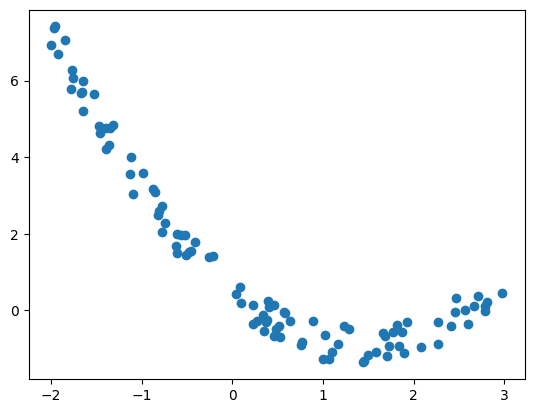

In [29]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+np.random.rand(m,1)
plt.scatter(x1,x2)
plt.plot()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

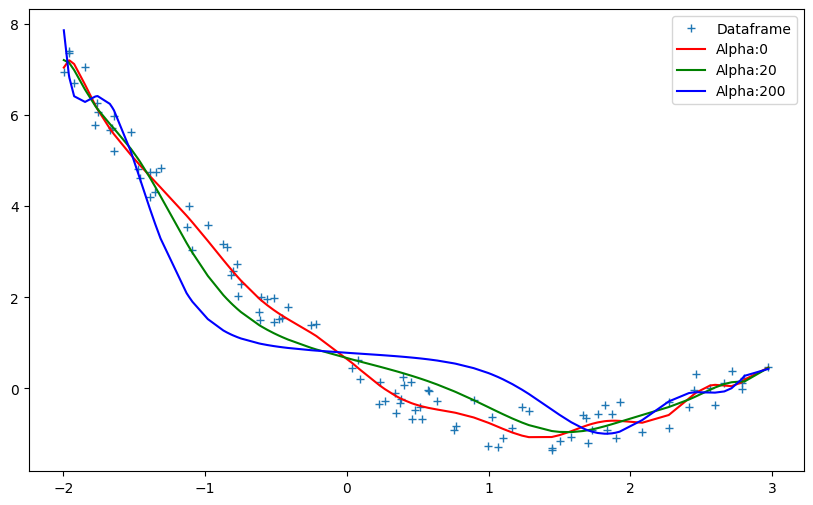

In [35]:
def get_pred_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,20,200]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'+',label='Dataframe')
for alpha,c in zip(alphas,cs):
    preds=get_pred_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha:{}'.format(alpha))
plt.legend()
plt.show()